# Setup

In [1]:
import pandas as pd
import functions
from sklearn.preprocessing import MinMaxScaler 
import seaborn as sns
import matplotlib.pyplot as pyplot

# Dataset preparation

In [2]:
train_set = pd.read_csv("/home/joel/datasets/datasets_reais/water-quality/water-quality_train.csv")
train_set.sample(5)

,25400-,29600-,30400-,33400-,17300-,19400-,34500-,38100-,49700-,50390-,...,hardness,no2,no3,nh4,po4,cl,sio2,kmno4,k2cr2o7,bod
4,0,0,1,0,0,1,0,0,1,0,...,3.112980,0.633360,2.147475,0.189854,0.357870,1.076535,2.598944,0.851321,0.827255,0.345227
29,1,0,0,0,1,1,0,0,1,0,...,3.782862,0.345469,2.822395,0.172978,0.147358,1.407777,2.460333,0.986451,0.707709,0.557675
90,0,0,0,1,1,1,0,1,1,0,...,3.901076,0.287891,3.129177,0.160321,0.105256,0.983373,1.490061,0.324313,0.396891,0.407191
87,1,1,0,0,1,0,0,0,0,0,...,2.521908,0.172734,0.981703,0.118131,0.021051,0.269134,1.732629,0.391878,0.272564,0.221300
15,0,0,0,0,1,1,1,0,1,0,...,3.388814,0.575782,2.975786,0.126569,0.294716,1.086886,2.598944,0.743217,0.411237,0.265560


In [3]:
test_set = pd.read_csv("/home/joel/datasets/datasets_reais/water-quality/water-quality_test.csv")
test_set.sample(5)

,25400-,29600-,30400-,33400-,17300-,19400-,34500-,38100-,49700-,50390-,...,hardness,no2,no3,nh4,po4,cl,sio2,kmno4,k2cr2o7,bod
411,1,1,0,0,0,1,0,0,1,0,...,3.507028,0.057578,1.135094,0.071723,0.063153,0.238080,0.485136,0.297287,0.129109,0.106224
297,0,1,0,0,0,1,0,0,1,1,...,4.216315,0.172734,3.251890,0.105474,0.168409,0.476160,1.316798,0.270261,0.301255,0.106224
593,1,1,1,1,1,1,0,1,1,0,...,4.019291,0.287891,2.178153,0.130788,0.063153,0.393349,1.732629,0.337826,0.334727,0.150484
194,1,0,1,0,1,1,0,1,1,1,...,4.413339,0.518203,2.270187,0.189854,0.252614,0.486511,1.178188,0.432417,0.358637,0.451451
23,0,1,0,0,0,1,0,0,1,1,...,3.861671,0.172734,1.319163,0.265795,0.294716,0.476160,2.252418,0.499982,0.578600,0.256708


In [4]:
train_set_input, train_set_labels = functions.split_atributtes_labels(train_set,14)
print(train_set_input.columns)
print(train_set_labels.columns)

Index(['std_temp', 'std_pH', 'conduct', 'o2', 'o2sat', 'co2', 'hardness',
       'no2', 'no3', 'nh4', 'po4', 'cl', 'sio2', 'kmno4', 'k2cr2o7', 'bod'],
      dtype='object')
Index(['25400-', '29600-', '30400-', '33400-', '17300-', '19400-', '34500-',
       '38100-', '49700-', '50390-', '55800-', '57500-', '59300-', '37880-'],
      dtype='object')


In [5]:
test_set_input, test_set_labels = functions.split_atributtes_labels(test_set,14)
print(test_set_input.columns)
print(test_set_labels.columns)

Index(['std_temp', 'std_pH', 'conduct', 'o2', 'o2sat', 'co2', 'hardness',
       'no2', 'no3', 'nh4', 'po4', 'cl', 'sio2', 'kmno4', 'k2cr2o7', 'bod'],
      dtype='object')
Index(['25400-', '29600-', '30400-', '33400-', '17300-', '19400-', '34500-',
       '38100-', '49700-', '50390-', '55800-', '57500-', '59300-', '37880-'],
      dtype='object')


# Normalization

## Seen distribuition before scaling

In [12]:
train_set_input.describe()

,std_temp,std_pH,conduct,o2,o2sat,co2,hardness,no2,no3,nh4,po4,cl,sio2,kmno4,k2cr2o7,bod
count,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000
mean,2.209159,23.596221,2.653175,4.297452,4.241415,0.852829,3.222938,0.512171,1.850919,0.314977,0.265445,1.052875,2.443502,0.743732,0.644362,0.419753
std,1.282915,0.951191,0.792249,1.290811,1.091368,1.739498,0.639755,0.864371,0.968876,0.957799,0.349515,0.932420,1.159310,0.569413,0.662722,0.657360
min,0.506467,21.319819,1.653865,0.041424,0.048964,0.000000,1.930836,0.057578,0.000000,0.042190,0.021051,0.217377,0.138610,0.229722,0.119546,0.061964
25%,1.012933,22.821215,2.025520,3.728167,4.046195,0.000000,2.915956,0.172734,1.196450,0.084379,0.084205,0.403701,1.663324,0.337826,0.301255,0.177040
50%,2.006387,23.722053,2.527255,4.432376,4.446809,0.155396,3.152385,0.345469,1.748658,0.113912,0.168409,0.807401,2.183113,0.648626,0.468618,0.239004
75%,3.369951,24.322611,3.010406,5.178010,4.731689,0.699283,3.625243,0.460625,2.423578,0.177197,0.315767,1.418128,2.980122,0.891860,0.736400,0.354079
max,4.908831,25.523727,6.197349,7.124941,6.396460,8.896433,4.965006,6.966957,4.908513,8.437948,2.484037,6.562724,6.480033,4.013370,4.590547,4.186989


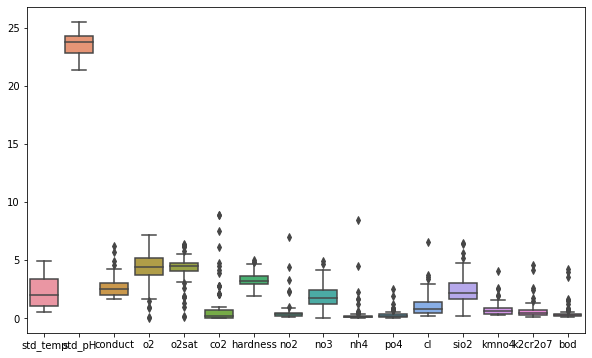

In [13]:
ax = sns.boxplot(data=train_set_input)
ax.figure.set_size_inches(10,6)

## Seen distribution after scaling

In [18]:
scaler = MinMaxScaler()
train_set_scalled = scaler.fit_transform(train_set_input)
train_set_scalled = pd.DataFrame(data=train_set_scalled, columns=train_set_input.columns)
train_set_scalled.describe()

,std_temp,std_pH,conduct,o2,o2sat,co2,hardness,no2,no3,nh4,po4,cl,sio2,kmno4,k2cr2o7,bod
count,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000
mean,0.386768,0.541497,0.219944,0.600835,0.660489,0.095862,0.425850,0.065794,0.377083,0.032491,0.099227,0.131671,0.363466,0.135850,0.117382,0.086736
std,0.291415,0.226263,0.174370,0.182227,0.171937,0.195528,0.210850,0.125101,0.197387,0.114081,0.141907,0.146946,0.182815,0.150493,0.148227,0.159359
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.115044,0.357143,0.081800,0.520468,0.629734,0.000000,0.324675,0.016667,0.243750,0.005025,0.025641,0.029364,0.240437,0.028571,0.040642,0.027897
50%,0.340708,0.571429,0.192229,0.619883,0.692847,0.017467,0.402597,0.041667,0.356250,0.008543,0.059829,0.092985,0.322404,0.110714,0.078075,0.042919
75%,0.650442,0.714286,0.298568,0.725146,0.737728,0.078603,0.558442,0.058333,0.493750,0.016080,0.119658,0.189233,0.448087,0.175000,0.137968,0.070815
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


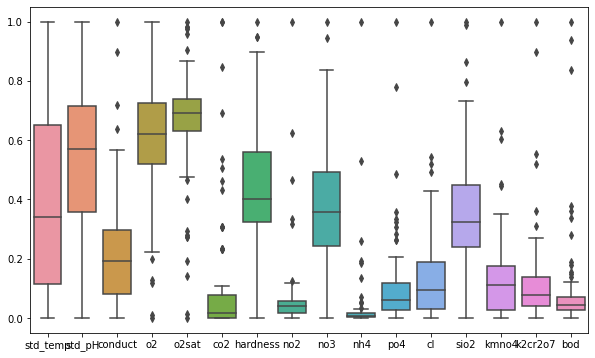

In [19]:
ax = sns.boxplot(data=train_set_scalled)
ax.figure.set_size_inches(10,6)

In [20]:
test_set_input_scalled = scaler.transform(test_set_input)
test_set_input_scalled = pd.DataFrame(data=test_set_input_scalled, columns=test_set_input.columns)
test_set_input_scalled.describe()

,std_temp,std_pH,conduct,o2,o2sat,co2,hardness,no2,no3,nh4,po4,cl,sio2,kmno4,k2cr2o7,bod
count,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000
mean,0.451114,0.693044,0.322738,0.612265,0.707366,0.039082,0.722703,0.057897,0.313508,0.025949,0.112391,0.053147,0.149841,0.088369,0.092573,0.067865
std,0.233734,0.225374,0.231339,0.143312,0.159616,0.098968,0.347038,0.139965,0.215302,0.102740,0.314481,0.091973,0.130625,0.238284,0.169763,0.128494
min,-0.101770,-0.071429,-0.151329,0.017544,0.021038,0.000000,-0.077922,-0.008333,0.006250,-0.003518,-0.008547,-0.024470,-0.010929,-0.057143,-0.012834,-0.010730
25%,0.272124,0.571429,0.177914,0.549708,0.646914,0.000000,0.493507,0.000000,0.181250,0.000503,0.008547,0.001631,0.065574,0.003571,0.016043,0.012876
50%,0.433628,0.714286,0.294479,0.631579,0.713184,0.000000,0.701299,0.016667,0.268750,0.005025,0.034188,0.019576,0.109290,0.028571,0.047059,0.027897
75%,0.612832,0.857143,0.431493,0.695906,0.779102,0.030568,0.922078,0.050000,0.406250,0.011558,0.094017,0.073410,0.191257,0.089286,0.112299,0.070815
max,1.101770,1.571429,2.370143,1.192983,1.659187,1.074236,2.636364,1.258333,3.831250,2.030151,4.991453,0.903752,1.021858,4.989287,3.320856,1.701717


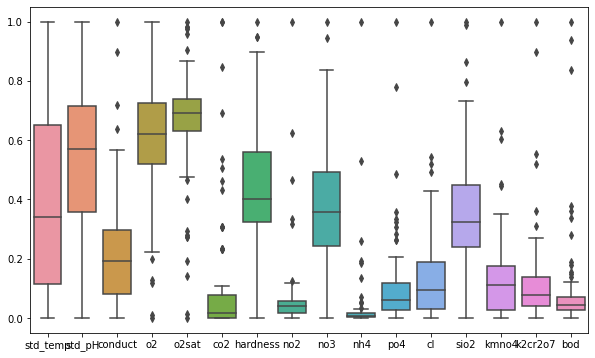

In [21]:
ax = sns.boxplot(data=train_set_scalled)
ax.figure.set_size_inches(10,6)

In [23]:
train_set_final = pd.concat([train_set_labels,train_set_scalled])
train_set_final.sample(5)

,25400-,29600-,30400-,33400-,17300-,19400-,34500-,38100-,49700-,50390-,...,hardness,no2,no3,nh4,po4,cl,sio2,kmno4,k2cr2o7,bod
23,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.207792,0.316667,0.2,0.005025,0.008547,0.017945,0.196721,0.017857,0.034225,0.040773


In [35]:
train_set_final = train_set_labels.merge(train_set_scalled,how='left',left_index=True,right_index=True)
test_set_final = test_set_labels.merge(test_set_input_scalled,how='left',left_index=True,right_index=True)

In [37]:
import arff

In [38]:
arff.dump("/home/joel/datasets/datasets_reais/water-quality/water-quality_scaled_train.arff",
train_set_final.values,
relation='relation name',
names=train_set_final.columns)

In [39]:
arff.dump("/home/joel/datasets/datasets_reais/water-quality/water-quality_scaled_test.arff",
test_set_final.values,
relation='whater-quality: -C 14',
names=train_set_final.columns)